# Price Recommendation System




**In this notebook, our objective is to construct a straightforward recommendation system. Initially, the user defines specific conditions, such as the number of bedrooms, and so on. The program then, based on the user-provided conditions, filters and selects all rows that meet these criteria. Following this, we employ linear regression, using the price and area of a building, to propose an optimal price for a new building.**

**The suggested price will be presented within an interval defined by subtracting and adding the Z-score from the model estimates.**



In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

importing Data and creating dataframe

In [5]:
data = pd.read_csv("../housing_price_dataset.csv")
df = pd.DataFrame(data=data)
df[:2]

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626


rename columns and convert all prices to absolute values (a few rows have negative prices): 

In [6]:
df.Price = df.Price.abs()
df.columns = ["squarefeet", "bedrooms", "bathrooms", "neighborhood", "yearbuilt", "price"]

## a Summery about the dataset:


#### Bathrooms : maximum = 3, minimum = 1
#### Bedrooms : maximum = 5, minimum = 2
#### Built Year : newest building belongs to 2021, oldest building belongs to 1950
#### Building Area : smallest building 1000 squarefeet, largest building 2999 squarefeet

In [11]:
def price_recommendation():
    


    # getting factors and features of house
    house_area = float(input("Enter area of house (in square feet) (max: 2999, min: 1000): "))
    neighborhood = input("Enter neighborhood ('Rural','Suburb','Urban'):" )
    year = int(input("Enter the year the building construction, (max: 2021, min: 1950): "))
    bath = int(input("enter number of bathrooms (max: 3, min: 1): "))
    bed = int(input("enter number of bedrooms (max: 5, min: 2): "))


    # selecting data from our main dataframe 
    condition = ((df.bathrooms == bath)
             & (df.bedrooms == bed)
             & (df.neighborhood == neighborhood)
             & (df.yearbuilt.between(year-5, year+5)
             & (df.squarefeet.between(house_area-200, house_area+200) ))) # for year condition, it is better to consider an year interval


    # create a new dataframe based on the given conditions
    data_cluster = df.loc[condition]

    # create a linear regression
    a, b = np.polyfit(x=data_cluster["squarefeet"], y=data_cluster["price"], deg=1)


    # calculate Z-score, to calculate Z-score i must find Mean, standard deviation of population.
    # calculate exact price from linear regression, after that we must plus or minus z-score to get fair points.
    fairestـprice = round(a,2)*(house_area) + round(b, 2)


    # calculate Z-score
    mean = data_cluster.price.mean()
    std_dev = data_cluster.price.std()
    
    std_error = data_cluster.price.std()/np.sqrt(len(data_cluster.price))
    
    value_x = fairestـprice
    
    z_score = (value_x - mean) / std_dev
    
    lower_limit = fairestـprice - (z_score*std_error)
    upper_limit = fairestـprice + (z_score*std_error)




    # create a diagram 
    plt.figure(figsize=(20,8))

    # Create the regplot
    sns.regplot(
        data=data_cluster, x="squarefeet", y="price",
        ci=99, marker="x", color=".3", line_kws=dict(color="r"),
    )


    # Add a new data point
    lower_limit_df = pd.DataFrame({"squarefeet": [house_area], "price": [lower_limit]})
    sns.scatterplot(data=lower_limit_df, x="squarefeet", y="price",
                    marker="o", color="yellow", s=30, label="The lowest price")

    # Add a new data point
    lower_limit_df = pd.DataFrame({"squarefeet": [house_area], "price": [upper_limit]})
    sns.scatterplot(data=lower_limit_df, x="squarefeet", y="price",
                    marker="o", color="red", s=30, label="The hightest price")

    # Add a new data point
    lower_limit_df = pd.DataFrame({"squarefeet": [house_area], "price": [fairestـprice]})
    sns.scatterplot(data=lower_limit_df, x="squarefeet", y="price",
                    marker="o", color="green", s=100, label="The fairest price")


    # Set plot title
    plt.title("Price - House Size")

    # Show the plot
    plt.legend()
    plt.show()


    
    #   f(x) is equal to 
    print(f"f(x) = {round(a,2)}x + {round(b, 2)}")

    # final massage for user
    print(f"""for a {house_area} SquareFeet house with {bath} bathrooms and {bed} bedrooms and built in year {year} at {neighborhood} 
        Based on linear regression model,
        fairest price is: {fairestـprice}, 
        lowest price is: {lower_limit},
        highest price is: {upper_limit}""")
        


    





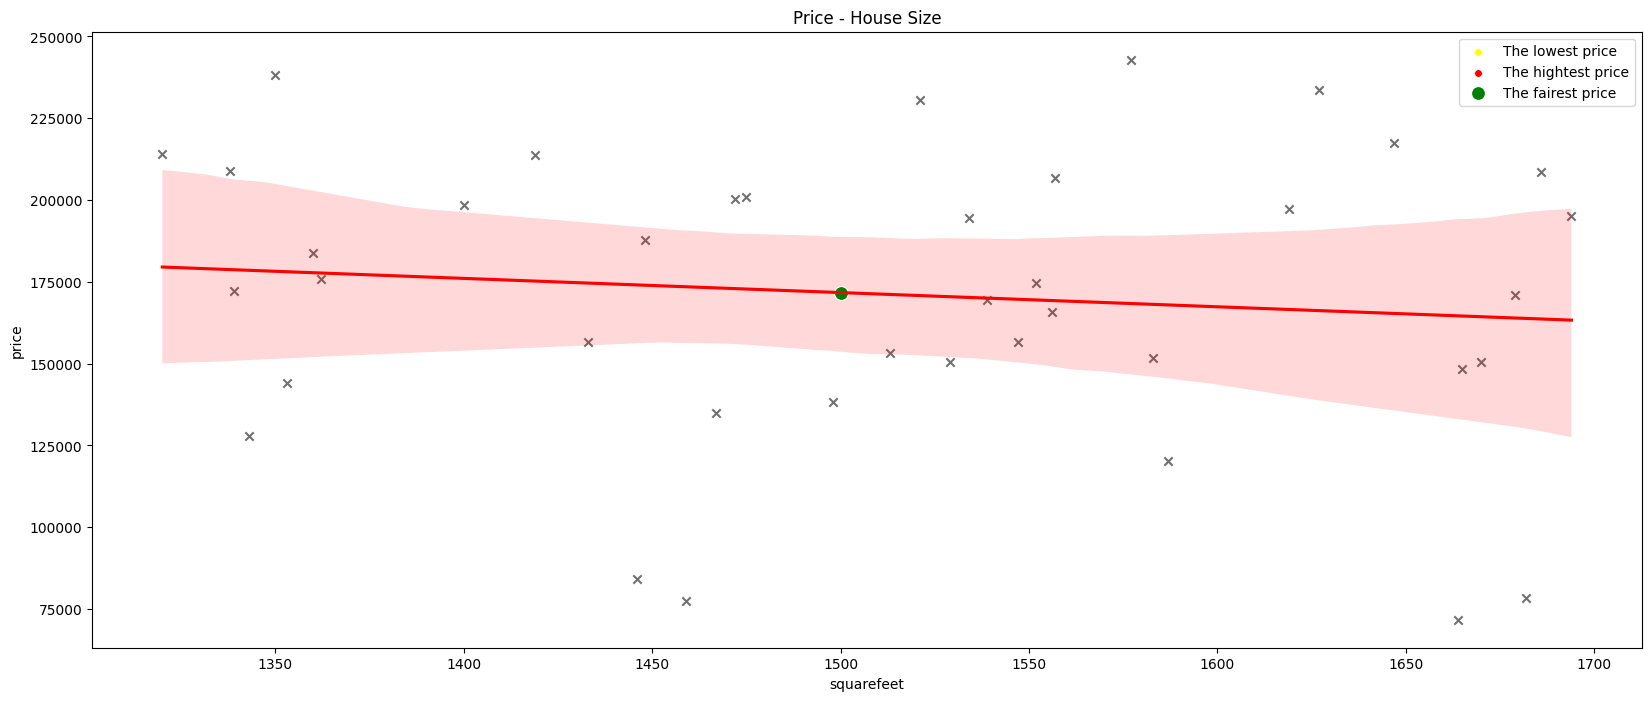

f(x) = -43.38x + 236794.3


NameError: name 'area' is not defined

In [12]:

price_recommendation()